Leveraging the dataset located here:
https://www.eia.gov/consumption/residential/data/2009/index.php?view=mi
crodata, can you build a model that predicts consumption? The electric
consumption is located in the KWH field.
The goal of the exercise is to understand how you&#39;d approach the problem,
how you would choose a model/which model, etc. Don&#39;t worry about it
being perfect - please do not spend more than a couple of hours on this. If
you have to make simplifying assumptions in the interest of time, please
make those. We would love to see the code you create for this (please
submit jupyter notebooks and/or python scripts).
If you have any questions, please reach out to us.

Keep in mind the Test grading is equally weighted on these five parts:

1. Data Engineering
2. Solution
3. Problem methodology
4. Code
5. Analysis write-up

In [0]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


#import torch

In [0]:
df = pd.read_csv("recs2009_public.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,...,BTUKEROTH,DOLLARKER,DOLKERSPH,DOLKERWTH,DOLKEROTH,BTUWOOD,CORDSWD,TOTALBTU,TOTALBTUSPH,TOTALBTUCOL,TOTALBTUWTH,TOTALBTURFG,TOTALBTUOTH,TOTALDOL,TOTALDOLSPH,TOTALDOLCOL,TOTALDOLWTH,TOTALDOLRFG,TOTALDOLOTH,KAVALEL,PERIODEL,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,4,3,METRO,U,1,-2,2004,7,8,-2,-2,-2,-2,-2,1,5,-2,-2,20,-2,4,1,2,5,9,1,0,0,1,1,...,0.0,0,0.0,0,0.0,0,0.0,63006,10873,10471,10128,5171,26363,1315,227,219,211,108,550,1,1,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,5,4,METRO,U,2,-2,1998,6,8,-2,-2,-2,-2,-2,2,2,-2,-2,31,-2,3,2,1,1,4,0,0,0,-2,-2,...,0.0,0,0.0,0,0.0,20000,1.0,103460,38606,621,30110,4470,29653,1293,368,17,287,121,501,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,1,2,METRO,U,2,-2,1965,3,7,-2,-2,-2,2,8,1,-2,0,1,-2,-2,1,1,0,1,2,-2,-2,-2,-2,-2,...,0.0,0,0.0,0,0.0,0,0.0,58716,40248,629,7933,3124,6781,1327,582,49,115,243,339,1,1,0,3,5,3,-2,-2,-2,-2,-2,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,1,2,METRO,U,1,-2,1985,5,5,-2,-2,-2,-2,-2,6,5,-2,-2,10,-2,3,2,1,4,7,0,1,0,-2,-2,...,0.0,0,0.0,0,0.0,0,0.0,76401,40196,3627,6440,5700,20438,1398,425,101,179,159,534,3,5,3,3,5,3,-2,-2,-2,-2,-2,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,1,3,METRO,U,1,1,1983,5,5,-2,-2,-2,-2,-2,2,5,-2,-2,20,-2,2,1,1,3,5,1,0,0,0,-2,...,0.0,0,0.0,0,0.0,0,0.0,59809,36136,0,13884,1182,8607,1558,616,0,237,85,620,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,5A,2251,0,5426,0.61,4,50,13,90


In [0]:
# bring 'KWH' column to front position in dataset for better analysis

kwh = df['KWH']
df.drop(labels=['KWH'], axis=1,inplace = True)
df.insert(0, 'KWH', kwh)
df

,KWH,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,...,BTUKEROTH,DOLLARKER,DOLKERSPH,DOLKERWTH,DOLKEROTH,BTUWOOD,CORDSWD,TOTALBTU,TOTALBTUSPH,TOTALBTUCOL,TOTALBTUWTH,TOTALBTURFG,TOTALBTUOTH,TOTALDOL,TOTALDOLSPH,TOTALDOLCOL,TOTALDOLWTH,TOTALDOLRFG,TOTALDOLOTH,KAVALEL,PERIODEL,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,18466,1,2,4,12,2,2471.68,4742,1080,4953,1271,4,3,METRO,U,1,-2,2004,7,8,-2,-2,-2,-2,-2,1,5,-2,-2,20,-2,4,1,2,5,9,1,0,0,1,...,0.0,0,0.0,0,0.0,0,0.0,63006,10873,10471,10128,5171,26363,1315,227,219,211,108,550,1,1,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,4A,2117,56,4250,0.48,6,56,9,96
1,5148,2,4,10,26,2,8599.17,2662,199,2688,143,5,4,METRO,U,2,-2,1998,6,8,-2,-2,-2,-2,-2,2,2,-2,-2,31,-2,3,2,1,1,4,0,0,0,-2,...,0.0,0,0.0,0,0.0,20000,1.0,103460,38606,621,30110,4470,29653,1293,368,17,287,121,501,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,3C,62,26,2393,0.61,0,64,38,73
2,2218,3,1,1,1,5,8969.92,6233,505,5741,829,1,2,METRO,U,2,-2,1965,3,7,-2,-2,-2,2,8,1,-2,0,1,-2,-2,1,1,0,1,2,-2,-2,-2,-2,...,0.0,0,0.0,0,0.0,0,0.0,58716,40248,629,7933,3124,6781,1327,582,49,115,243,339,1,1,0,3,5,3,-2,-2,-2,-2,-2,-2,5A,2346,49,5654,0.48,3,52,12,88
3,10015,4,2,3,7,2,18003.64,6034,672,5781,868,1,2,METRO,U,1,-2,1985,5,5,-2,-2,-2,-2,-2,6,5,-2,-2,10,-2,3,2,1,4,7,0,1,0,-2,...,0.0,0,0.0,0,0.0,0,0.0,76401,40196,3627,6440,5700,20438,1398,425,101,179,159,534,3,5,3,3,5,3,-2,-2,-2,-2,-2,-2,5A,2746,0,4941,0.55,4,55,7,87
4,2869,5,1,1,1,3,5999.61,5388,702,5313,797,1,3,METRO,U,1,1,1983,5,5,-2,-2,-2,-2,-2,2,5,-2,-2,20,-2,2,1,1,3,5,1,0,0,0,...,0.0,0,0.0,0,0.0,0,0.0,59809,36136,0,13884,1182,8607,1558,616,0,237,85,620,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,5A,2251,0,5426,0.61,4,50,13,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,7647,12079,2,3,9,2,10219.80,7671,332,7784,451,1,1,METRO,U,1,-2,1985,5,7,-2,-2,-2,-2,-2,3,6,-2,-2,10,-2,3,2,0,3,6,1,0,0,1,...,0.0,0,0.0,0,0.0,20000,1.0,75702,49610,333,6471,1933,17356,1541,521,13,253,76,678,1,1,0,3,5,3,-2,-2,-2,-2,-2,-2,6A-6B,4289,39,7819,0.59,0,48,-3,84
12079,1813,12080,3,7,21,4,8689.07,2085,2844,2520,2286,2,5,METRO,U,2,-2,1980,5,8,1,-2,-2,-2,-2,1,2,1,1,-2,-2,-2,1,0,1,1,0,0,1,-2,...,0.0,0,0.0,0,0.0,0,0.0,25251,15148,1217,3645,1979,3262,543,273,51,54,83,82,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,3B-4B,360,393,1869,0.50,0,56,26,101
12080,9834,12081,2,4,10,2,4697.21,7935,472,8074,600,1,1,METRO,U,1,-2,1993,6,7,-2,-2,-2,-2,-2,3,6,-2,-2,31,-2,4,3,1,4,8,0,0,0,-2,...,0.0,0,0.0,0,0.0,0,0.0,148252,70626,2893,24391,7413,42930,2093,591,98,204,250,950,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,6A-6B,4494,22,8477,0.58,1,46,-9,89
12081,4800,12082,4,8,23,2,13155.68,5834,770,5989,957,1,2,METRO,U,1,-2,1930,1,4,-2,-2,-2,-2,-2,1,6,-2,-2,10,-2,3,1,0,2,5,1,0,0,1,...,0.0,0,0.0,0,0.0,0,0.0,81978,49821,463,12416,6318,12960,1023,432,13,108,175,295,1,1,0,1,1,0,-2,-2,-2,-2,-2,-2,5B-5C,2840,0,9010,0.54,1,53,13,93


In [0]:
df['KWH']

0        18466
1         5148
2         2218
3        10015
4         2869
         ...  
12078     7647
12079     1813
12080     9834
12081     4800
12082     1764
Name: KWH, Length: 12083, dtype: int64

In [0]:
# check the dataset

In [0]:
df.describe()

In [0]:
# check for null / missing values in the dataset
df.isnull().values.any()


False

In [0]:
# check for correlation between columns (features) with output column (KWH) [not all columns as that would take a long time]

In [0]:
#corr_KWH = df.drop(columns=['DOEID']).corrwith(df['KWH'])
corr_matrix = df.corr()
print(corr_matrix["KWH"].sort_values(ascending=False))

corr_columns = corr_matrix["KWH"].sort_values(ascending=False)

KWH            1.000000
BTUEL          1.000000
BTUELOTH       0.880403
KWHOTH         0.880403
DOLLAREL       0.868712
                 ...   
ZH2OTYPE2           NaN
USEEL               NaN
ZOTHERWAYFO         NaN
ZNOCRCASH           NaN
ZNKRGALNC           NaN
Name: KWH, Length: 935, dtype: float64


In [0]:
corr_kwh = pd.DataFrame(corr_matrix['KWH'])

In [0]:
# select only those features with correlation of greater than 0.3 with 'KWH' or consumption columm
# consider both positive & negetive correlation here, so abs value taken
features = corr_kwh.loc[(abs(corr_kwh['KWH']) >= 0.3)]

In [0]:
features

,KWH
KWH,1.000000
TYPEHUQ,-0.353123
STUDIO,-0.340583
NAPTFLRS,-0.332795
BEDROOMS,0.403322
...,...
TOTALDOLCOL,0.601628
TOTALDOLWTH,0.437826
TOTALDOLRFG,0.433450
TOTALDOLOTH,0.655742


In [0]:
features.index

Index(['KWH', 'TYPEHUQ', 'STUDIO', 'NAPTFLRS', 'BEDROOMS', 'NCOMBATH',
       'OTHROOMS', 'TOTROOMS', 'PRKGPLC1', 'NUMFRIG', 'DWASHUSE', 'CWASHER',
       'TOPFRONT', 'WASHLOAD', 'WASHTEMP', 'RNSETEMP', 'DRYER', 'DRYRFUEL',
       'TVCOLOR', 'TVSIZE3', 'TVTYPE3', 'CABLESAT3', 'PLAYSTA3', 'TVAUDIOSYS3',
       'TVONWE3', 'WELLPUMP', 'HEATROOM', 'FUELH2O', 'CENACHP', 'ACOTHERS',
       'MAINTAC', 'ACROOMS', 'USECENAC', 'THERMAINAC', 'PROTHERMAC',
       'TEMPHOMEAC', 'TEMPGONEAC', 'TEMPNITEAC', 'NUMCFAN', 'SWIMPOOL', 'POOL',
       'NOUTLGTNT', 'USENG', 'ELWATER', 'UGWATER', 'PELHOTWA', 'PELAC',
       'PGASHTWA', 'TOTSQFT', 'TOTSQFT_EN', 'TOTHSQFT', 'TOTCSQFT', 'KWHSPH',
       'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH', 'BTUEL', 'BTUELSPH', 'BTUELCOL',
       'BTUELWTH', 'BTUELRFG', 'BTUELOTH', 'DOLLAREL', 'DOLELSPH', 'DOLELCOL',
       'DOLELWTH', 'DOLELRFG', 'DOLELOTH', 'TOTALBTU', 'TOTALBTUCOL',
       'TOTALBTURFG', 'TOTALBTUOTH', 'TOTALDOL', 'TOTALDOLCOL', 'TOTALDOLWTH',
       'TOTAL

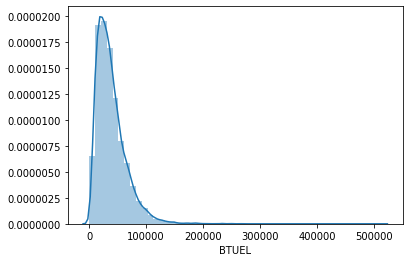

In [0]:
# Plot and see some features 

sns.distplot(df.BTUEL)


In [0]:
# drop features with correlation = 1 as that suggests , after dataset analysis that it is just change of unit type of KWH , thus should not be included as a feature

features.drop(index = 'BTUEL', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
features.index

Index(['KWH', 'TYPEHUQ', 'STUDIO', 'NAPTFLRS', 'BEDROOMS', 'NCOMBATH',
       'OTHROOMS', 'TOTROOMS', 'PRKGPLC1', 'NUMFRIG', 'DWASHUSE', 'CWASHER',
       'TOPFRONT', 'WASHLOAD', 'WASHTEMP', 'RNSETEMP', 'DRYER', 'DRYRFUEL',
       'TVCOLOR', 'TVSIZE3', 'TVTYPE3', 'CABLESAT3', 'PLAYSTA3', 'TVAUDIOSYS3',
       'TVONWE3', 'WELLPUMP', 'HEATROOM', 'FUELH2O', 'CENACHP', 'ACOTHERS',
       'MAINTAC', 'ACROOMS', 'USECENAC', 'THERMAINAC', 'PROTHERMAC',
       'TEMPHOMEAC', 'TEMPGONEAC', 'TEMPNITEAC', 'NUMCFAN', 'SWIMPOOL', 'POOL',
       'NOUTLGTNT', 'USENG', 'ELWATER', 'UGWATER', 'PELHOTWA', 'PELAC',
       'PGASHTWA', 'TOTSQFT', 'TOTSQFT_EN', 'TOTHSQFT', 'TOTCSQFT', 'KWHSPH',
       'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH', 'BTUELSPH', 'BTUELCOL',
       'BTUELWTH', 'BTUELRFG', 'BTUELOTH', 'DOLLAREL', 'DOLELSPH', 'DOLELCOL',
       'DOLELWTH', 'DOLELRFG', 'DOLELOTH', 'TOTALBTU', 'TOTALBTUCOL',
       'TOTALBTURFG', 'TOTALBTUOTH', 'TOTALDOL', 'TOTALDOLCOL', 'TOTALDOLWTH',
       'TOTALDOLRFG', 

In [0]:
# check and combine features maybe height and width of house 

In [0]:
corr_matrix = df.corr()

plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix)

In [0]:
selected_columns1 = features.index

data = df[selected_columns1]

In [0]:
data.head()

,KWH,TYPEHUQ,STUDIO,NAPTFLRS,BEDROOMS,NCOMBATH,OTHROOMS,TOTROOMS,PRKGPLC1,NUMFRIG,DWASHUSE,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,DRYER,DRYRFUEL,TVCOLOR,TVSIZE3,TVTYPE3,CABLESAT3,PLAYSTA3,TVAUDIOSYS3,TVONWE3,WELLPUMP,HEATROOM,FUELH2O,CENACHP,ACOTHERS,MAINTAC,ACROOMS,USECENAC,THERMAINAC,PROTHERMAC,TEMPHOMEAC,TEMPGONEAC,TEMPNITEAC,NUMCFAN,SWIMPOOL,POOL,NOUTLGTNT,USENG,ELWATER,UGWATER,PELHOTWA,PELAC,PGASHTWA,TOTSQFT,TOTSQFT_EN,TOTHSQFT,TOTCSQFT,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHOTH,BTUELSPH,BTUELCOL,BTUELWTH,BTUELRFG,BTUELOTH,DOLLAREL,DOLELSPH,DOLELCOL,DOLELWTH,DOLELRFG,DOLELOTH,TOTALBTU,TOTALBTUCOL,TOTALBTURFG,TOTALBTUOTH,TOTALDOL,TOTALDOLCOL,TOTALDOLWTH,TOTALDOLRFG,TOTALDOLOTH,KAVALNG
0,18466,2,-2,-2,4,1,5,9,1,2,13,1,2,2,3,3,1,5,4,3,3,0,0,0,2,0,9,5,0,0,1,9,3,1,1,74,78,73,3,0,-2,0,0,1,0,1,1,-2,5075,4675,3958,3958,3186.71,3068.80,2968.45,1515.50,7726.55,10873.05,10470.73,10128.35,5170.90,26362.97,1315,226.93,218.54,211.39,107.92,550.22,63006,10471,5171,26363,1315,219,211,108,550,-2
1,5148,2,-2,-2,3,2,1,4,1,1,-2,1,1,2,3,3,1,1,2,-2,-2,-2,-2,-2,-2,0,4,1,0,0,0,4,1,1,0,-2,-2,-2,0,0,-2,0,1,0,1,-2,1,1,3136,2736,2736,2736,0.00,182.00,0.00,1310.22,3655.78,0.00,620.98,0.00,4470.48,12473.54,475,0.00,16.79,0.00,120.89,337.32,103460,621,4470,29653,1293,17,287,121,501,1
2,2218,5,0,1,1,1,1,2,-2,1,-2,0,-2,-2,-2,-2,0,-2,1,-2,-2,-2,-2,-2,-2,-2,2,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,1,0,1,-2,-2,2,528,528,528,264,0.00,184.46,0.00,915.66,1117.88,0.00,629.39,0.00,3124.32,3814.29,588,0.00,48.90,0.00,242.75,296.35,58716,629,3124,6781,1327,49,115,243,339,3
3,10015,2,-2,-2,3,2,4,7,1,2,20,1,1,2,2,3,1,5,5,1,1,1,0,0,2,0,7,5,0,0,0,7,3,1,0,74,74,68,1,0,-2,0,1,1,0,1,1,-2,2023,1623,1623,1623,0.00,1063.02,1887.53,1670.53,5393.91,0.00,3627.01,6440.22,5699.83,18403.93,952,0.00,101.05,179.42,158.80,512.73,76401,3627,5700,20438,1398,101,179,159,534,3
4,2869,3,-2,-2,2,1,3,5,0,1,30,1,1,2,2,3,1,5,2,-2,-2,-2,-2,-2,-2,0,5,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,-2,0,1,0,1,-2,-2,1,1912,1912,1274,0,0.00,0.00,0.00,346.47,2522.53,0.00,0.00,0.00,1182.14,8606.86,705,0.00,0.00,0.00,85.14,619.86,59809,0,1182,8607,1558,0,237,85,620,1


In [0]:
# bring 'KWH' column to front position in dataset for better analysis

kwh = data['KWH']
data.drop(labels=['KWH'], axis=1,inplace = True)
data.insert(0, 'KWH', kwh)
data

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,KWH,TYPEHUQ,STUDIO,NAPTFLRS,BEDROOMS,NCOMBATH,OTHROOMS,TOTROOMS,PRKGPLC1,NUMFRIG,DWASHUSE,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,DRYER,DRYRFUEL,TVCOLOR,TVSIZE3,TVTYPE3,CABLESAT3,PLAYSTA3,TVAUDIOSYS3,TVONWE3,WELLPUMP,HEATROOM,FUELH2O,CENACHP,ACOTHERS,MAINTAC,ACROOMS,USECENAC,THERMAINAC,PROTHERMAC,TEMPHOMEAC,TEMPGONEAC,TEMPNITEAC,NUMCFAN,SWIMPOOL,POOL,NOUTLGTNT,USENG,ELWATER,UGWATER,PELHOTWA,PELAC,PGASHTWA,TOTSQFT,TOTSQFT_EN,TOTHSQFT,TOTCSQFT,KWHSPH,KWHCOL,KWHWTH,KWHRFG,KWHOTH,BTUELSPH,BTUELCOL,BTUELWTH,BTUELRFG,BTUELOTH,DOLLAREL,DOLELSPH,DOLELCOL,DOLELWTH,DOLELRFG,DOLELOTH,TOTALBTU,TOTALBTUCOL,TOTALBTURFG,TOTALBTUOTH,TOTALDOL,TOTALDOLCOL,TOTALDOLWTH,TOTALDOLRFG,TOTALDOLOTH,KAVALNG
0,18466,2,-2,-2,4,1,5,9,1,2,13,1,2,2,3,3,1,5,4,3,3,0,0,0,2,0,9,5,0,0,1,9,3,1,1,74,78,73,3,0,-2,0,0,1,0,1,1,-2,5075,4675,3958,3958,3186.71,3068.80,2968.45,1515.50,7726.55,10873.05,10470.73,10128.35,5170.90,26362.97,1315,226.93,218.54,211.39,107.92,550.22,63006,10471,5171,26363,1315,219,211,108,550,-2
1,5148,2,-2,-2,3,2,1,4,1,1,-2,1,1,2,3,3,1,1,2,-2,-2,-2,-2,-2,-2,0,4,1,0,0,0,4,1,1,0,-2,-2,-2,0,0,-2,0,1,0,1,-2,1,1,3136,2736,2736,2736,0.00,182.00,0.00,1310.22,3655.78,0.00,620.98,0.00,4470.48,12473.54,475,0.00,16.79,0.00,120.89,337.32,103460,621,4470,29653,1293,17,287,121,501,1
2,2218,5,0,1,1,1,1,2,-2,1,-2,0,-2,-2,-2,-2,0,-2,1,-2,-2,-2,-2,-2,-2,-2,2,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,-2,-2,-2,1,0,1,-2,-2,2,528,528,528,264,0.00,184.46,0.00,915.66,1117.88,0.00,629.39,0.00,3124.32,3814.29,588,0.00,48.90,0.00,242.75,296.35,58716,629,3124,6781,1327,49,115,243,339,3
3,10015,2,-2,-2,3,2,4,7,1,2,20,1,1,2,2,3,1,5,5,1,1,1,0,0,2,0,7,5,0,0,0,7,3,1,0,74,74,68,1,0,-2,0,1,1,0,1,1,-2,2023,1623,1623,1623,0.00,1063.02,1887.53,1670.53,5393.91,0.00,3627.01,6440.22,5699.83,18403.93,952,0.00,101.05,179.42,158.80,512.73,76401,3627,5700,20438,1398,101,179,159,534,3
4,2869,3,-2,-2,2,1,3,5,0,1,30,1,1,2,2,3,1,5,2,-2,-2,-2,-2,-2,-2,0,5,1,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,-2,0,1,0,1,-2,-2,1,1912,1912,1274,0,0.00,0.00,0.00,346.47,2522.53,0.00,0.00,0.00,1182.14,8606.86,705,0.00,0.00,0.00,85.14,619.86,59809,0,1182,8607,1558,0,237,85,620,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,7647,2,-2,-2,3,2,3,6,1,1,20,1,2,2,2,3,1,5,2,-2,-2,-2,-2,-2,-2,0,5,5,0,0,1,5,1,1,1,-2,-2,-2,3,0,-2,0,1,1,0,1,1,-2,2560,2160,893,893,0.00,97.50,1896.41,566.54,5086.55,0.00,332.67,6470.65,1933.08,17355.61,1020,0.00,13.01,252.95,75.57,678.47,75702,333,1933,17356,1541,13,253,76,678,3
12079,1813,4,1,1,-2,1,1,1,-2,1,-2,0,-2,-2,-2,-2,0,-2,1,-2,-2,-2,-2,-2,-2,-2,1,1,0,0,0,1,1,0,-2,-2,-2,-2,0,-2,-2,-2,1,0,1,-2,1,1,502,502,502,502,519.59,356.57,0.00,580.11,356.74,1772.84,1216.63,0.00,1979.33,1217.20,260,74.51,51.14,0.00,83.19,51.16,25251,1217,1979,3262,543,51,54,83,82,1
12080,9834,2,-2,-2,4,3,4,8,1,2,20,1,1,3,2,3,1,1,4,1,2,1,0,0,1,0,8,1,0,0,1,8,1,1,1,-2,-2,-2,2,0,-2,0,1,0,1,-2,1,1,4581,4181,4181,4181,0.00,847.73,0.00,2172.62,6813.65,0.00,2892.50,0.00,7413.07,23248.43,1133,0.00,97.67,0.00,250.31,785.02,148252,2893,7413,42930,2093,98,204,250,950,1
12081,4800,2,-2,-2,3,1,2,5,0,2,-2,1,1,2,2,3,1,1,2,-2,-2,-2,-2,-2,-2,0,5,1,0,0,0,3,1,1,1,-2,-2,-2,2,0,-2,0,1,0,1,-2,1,1,1728,1728,864,518,0.00,135.69,0.00,1851.65,2812.67,0.00,462.98,0.00,6317.98,9597.05,454,0.00,12.83,0.00,175.14,266.03,81978,463,6318,12960,1023,13,108,175,295,1


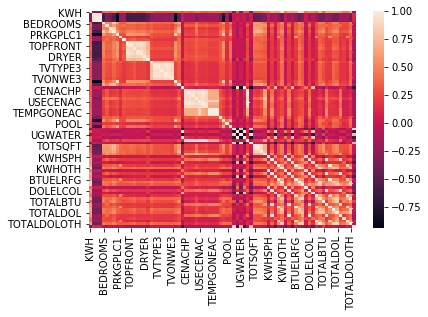

In [0]:
# now check correlation between the selected features
corr = data.corr()
sns.heatmap(corr)

In [0]:
# check for mulit-collinearity and avoid similar features to be fed to ML  model
# So I compare the correlation between features and remove one of two features that have a correlation higher than 0.8

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns2 = data.columns[columns]
data = data[selected_columns2]

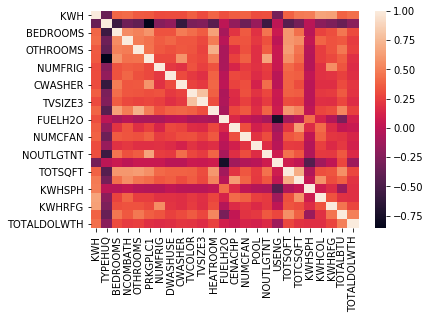

In [0]:
corr = data.corr()
sns.heatmap(corr)

In [0]:
# Seems we have been able to remove collinear features , as the matrix visualization suggests above
# Only 25 features are selected now , as per collinearity condition

In [0]:
data.head()

,KWH,TYPEHUQ,BEDROOMS,NCOMBATH,OTHROOMS,PRKGPLC1,NUMFRIG,DWASHUSE,CWASHER,TVCOLOR,TVSIZE3,HEATROOM,FUELH2O,CENACHP,NUMCFAN,POOL,NOUTLGTNT,USENG,TOTSQFT,TOTCSQFT,KWHSPH,KWHCOL,KWHRFG,TOTALBTU,TOTALDOLWTH
0,18466,2,4,1,5,1,2,13,1,4,3,9,5,0,3,-2,0,0,5075,3958,3186.71,3068.80,1515.50,63006,211
1,5148,2,3,2,1,1,1,-2,1,2,-2,4,1,0,0,-2,0,1,3136,2736,0.00,182.00,1310.22,103460,287
2,2218,5,1,1,1,-2,1,-2,0,1,-2,2,1,-2,1,-2,-2,1,528,264,0.00,184.46,915.66,58716,115
3,10015,2,3,2,4,1,2,20,1,5,1,7,5,0,1,-2,0,1,2023,1623,0.00,1063.02,1670.53,76401,179
4,2869,3,2,1,3,0,1,30,1,2,-2,5,1,-2,0,-2,0,1,1912,0,0.00,0.00,346.47,59809,237


In [0]:
# test
selected_columns2

Index(['KWH', 'TYPEHUQ', 'BEDROOMS', 'NCOMBATH', 'OTHROOMS', 'PRKGPLC1',
       'NUMFRIG', 'DWASHUSE', 'CWASHER', 'TVCOLOR', 'TVSIZE3', 'HEATROOM',
       'FUELH2O', 'CENACHP', 'NUMCFAN', 'POOL', 'NOUTLGTNT', 'USENG',
       'TOTSQFT', 'TOTCSQFT', 'KWHSPH', 'KWHCOL', 'KWHRFG', 'TOTALBTU',
       'TOTALDOLWTH'],
      dtype='object')

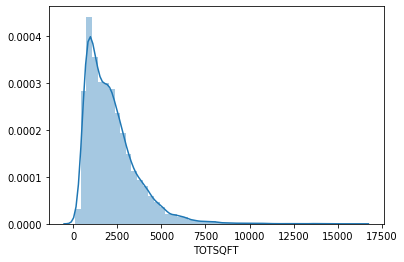

In [0]:
# Plot and see some of these features

sns.distplot(data.TOTSQFT)

In [0]:
# Now select the best combination of features to be fed to the ML model by trying out various combinations of the selected features based on p-value test
# keeping the KWH column values out as we need to predict that column

selected_columns2 = selected_columns2[1:]
import statsmodels.formula.api as sm
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns2 = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns2)
backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns2)

(array([[2.00000e+00, 4.00000e+00, 5.00000e+00, ..., 1.51550e+03,
         6.30060e+04, 2.11000e+02],
        [2.00000e+00, 3.00000e+00, 1.00000e+00, ..., 1.31022e+03,
         1.03460e+05, 2.87000e+02],
        [5.00000e+00, 1.00000e+00, 1.00000e+00, ..., 9.15660e+02,
         5.87160e+04, 1.15000e+02],
        ...,
        [2.00000e+00, 4.00000e+00, 4.00000e+00, ..., 2.17262e+03,
         1.48252e+05, 2.04000e+02],
        [2.00000e+00, 3.00000e+00, 2.00000e+00, ..., 1.85165e+03,
         8.19780e+04, 1.08000e+02],
        [2.00000e+00, 2.00000e+00, 2.00000e+00, ..., 4.18770e+02,
         3.81000e+04, 8.40000e+01]]),
 Index(['TYPEHUQ', 'BEDROOMS', 'PRKGPLC1', 'NUMFRIG', 'DWASHUSE', 'CWASHER',
        'TVCOLOR', 'HEATROOM', 'CENACHP', 'NUMCFAN', 'POOL', 'NOUTLGTNT',
        'USENG', 'TOTSQFT', 'KWHSPH', 'KWHCOL', 'TOTALBTU', 'TOTALDOLWTH'],
       dtype='object'))

In [0]:
result = pd.DataFrame()
result['KWH'] = data.iloc[:,0]

In [0]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns2)


In [0]:
data.head()

,TYPEHUQ,BEDROOMS,OTHROOMS,PRKGPLC1,NUMFRIG,DWASHUSE,CWASHER,TVCOLOR,HEATROOM,FUELH2O,CENACHP,NUMCFAN,POOL,NOUTLGTNT,USENG,TOTSQFT,KWHSPH,KWHCOL,KWHRFG,TOTALBTU,TOTALDOLWTH
0,2.0,4.0,5.0,1.0,2.0,13.0,1.0,4.0,9.0,5.0,0.0,3.0,-2.0,0.0,0.0,5075.0,3186.71,3068.80,1515.50,63006.0,211.0
1,2.0,3.0,1.0,1.0,1.0,-2.0,1.0,2.0,4.0,1.0,0.0,0.0,-2.0,0.0,1.0,3136.0,0.00,182.00,1310.22,103460.0,287.0
2,5.0,1.0,1.0,-2.0,1.0,-2.0,0.0,1.0,2.0,1.0,-2.0,1.0,-2.0,-2.0,1.0,528.0,0.00,184.46,915.66,58716.0,115.0
3,2.0,3.0,4.0,1.0,2.0,20.0,1.0,5.0,7.0,5.0,0.0,1.0,-2.0,0.0,1.0,2023.0,0.00,1063.02,1670.53,76401.0,179.0
4,3.0,2.0,3.0,0.0,1.0,30.0,1.0,2.0,5.0,1.0,-2.0,0.0,-2.0,0.0,1.0,1912.0,0.00,0.00,346.47,59809.0,237.0


In [0]:
# visualizing the selected features


In [0]:
processed_df = data.merge(result,right_index=True,left_index=True)

In [0]:
processed_df.head()

,TYPEHUQ,BEDROOMS,OTHROOMS,PRKGPLC1,NUMFRIG,DWASHUSE,CWASHER,TVCOLOR,HEATROOM,FUELH2O,CENACHP,NUMCFAN,POOL,NOUTLGTNT,USENG,TOTSQFT,KWHSPH,KWHCOL,KWHRFG,TOTALBTU,TOTALDOLWTH,KWH
0,2.0,4.0,5.0,1.0,2.0,13.0,1.0,4.0,9.0,5.0,0.0,3.0,-2.0,0.0,0.0,5075.0,3186.71,3068.80,1515.50,63006.0,211.0,18466
1,2.0,3.0,1.0,1.0,1.0,-2.0,1.0,2.0,4.0,1.0,0.0,0.0,-2.0,0.0,1.0,3136.0,0.00,182.00,1310.22,103460.0,287.0,5148
2,5.0,1.0,1.0,-2.0,1.0,-2.0,0.0,1.0,2.0,1.0,-2.0,1.0,-2.0,-2.0,1.0,528.0,0.00,184.46,915.66,58716.0,115.0,2218
3,2.0,3.0,4.0,1.0,2.0,20.0,1.0,5.0,7.0,5.0,0.0,1.0,-2.0,0.0,1.0,2023.0,0.00,1063.02,1670.53,76401.0,179.0,10015
4,3.0,2.0,3.0,0.0,1.0,30.0,1.0,2.0,5.0,1.0,-2.0,0.0,-2.0,0.0,1.0,1912.0,0.00,0.00,346.47,59809.0,237.0,2869


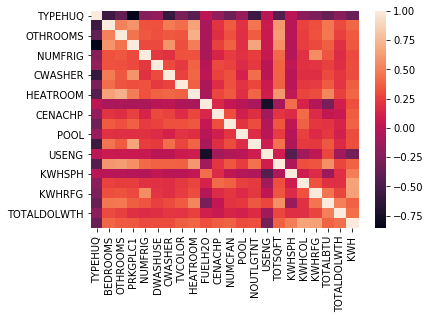

In [0]:
# overview of features 

corr = processed_df.corr()
sns.heatmap(corr)


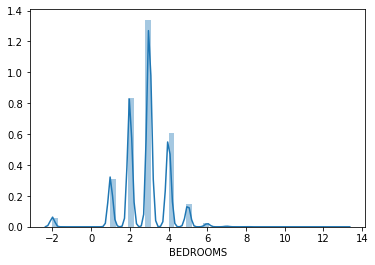

In [0]:
# PLot and see some of these features

sns.distplot(processed_df.BEDROOMS)

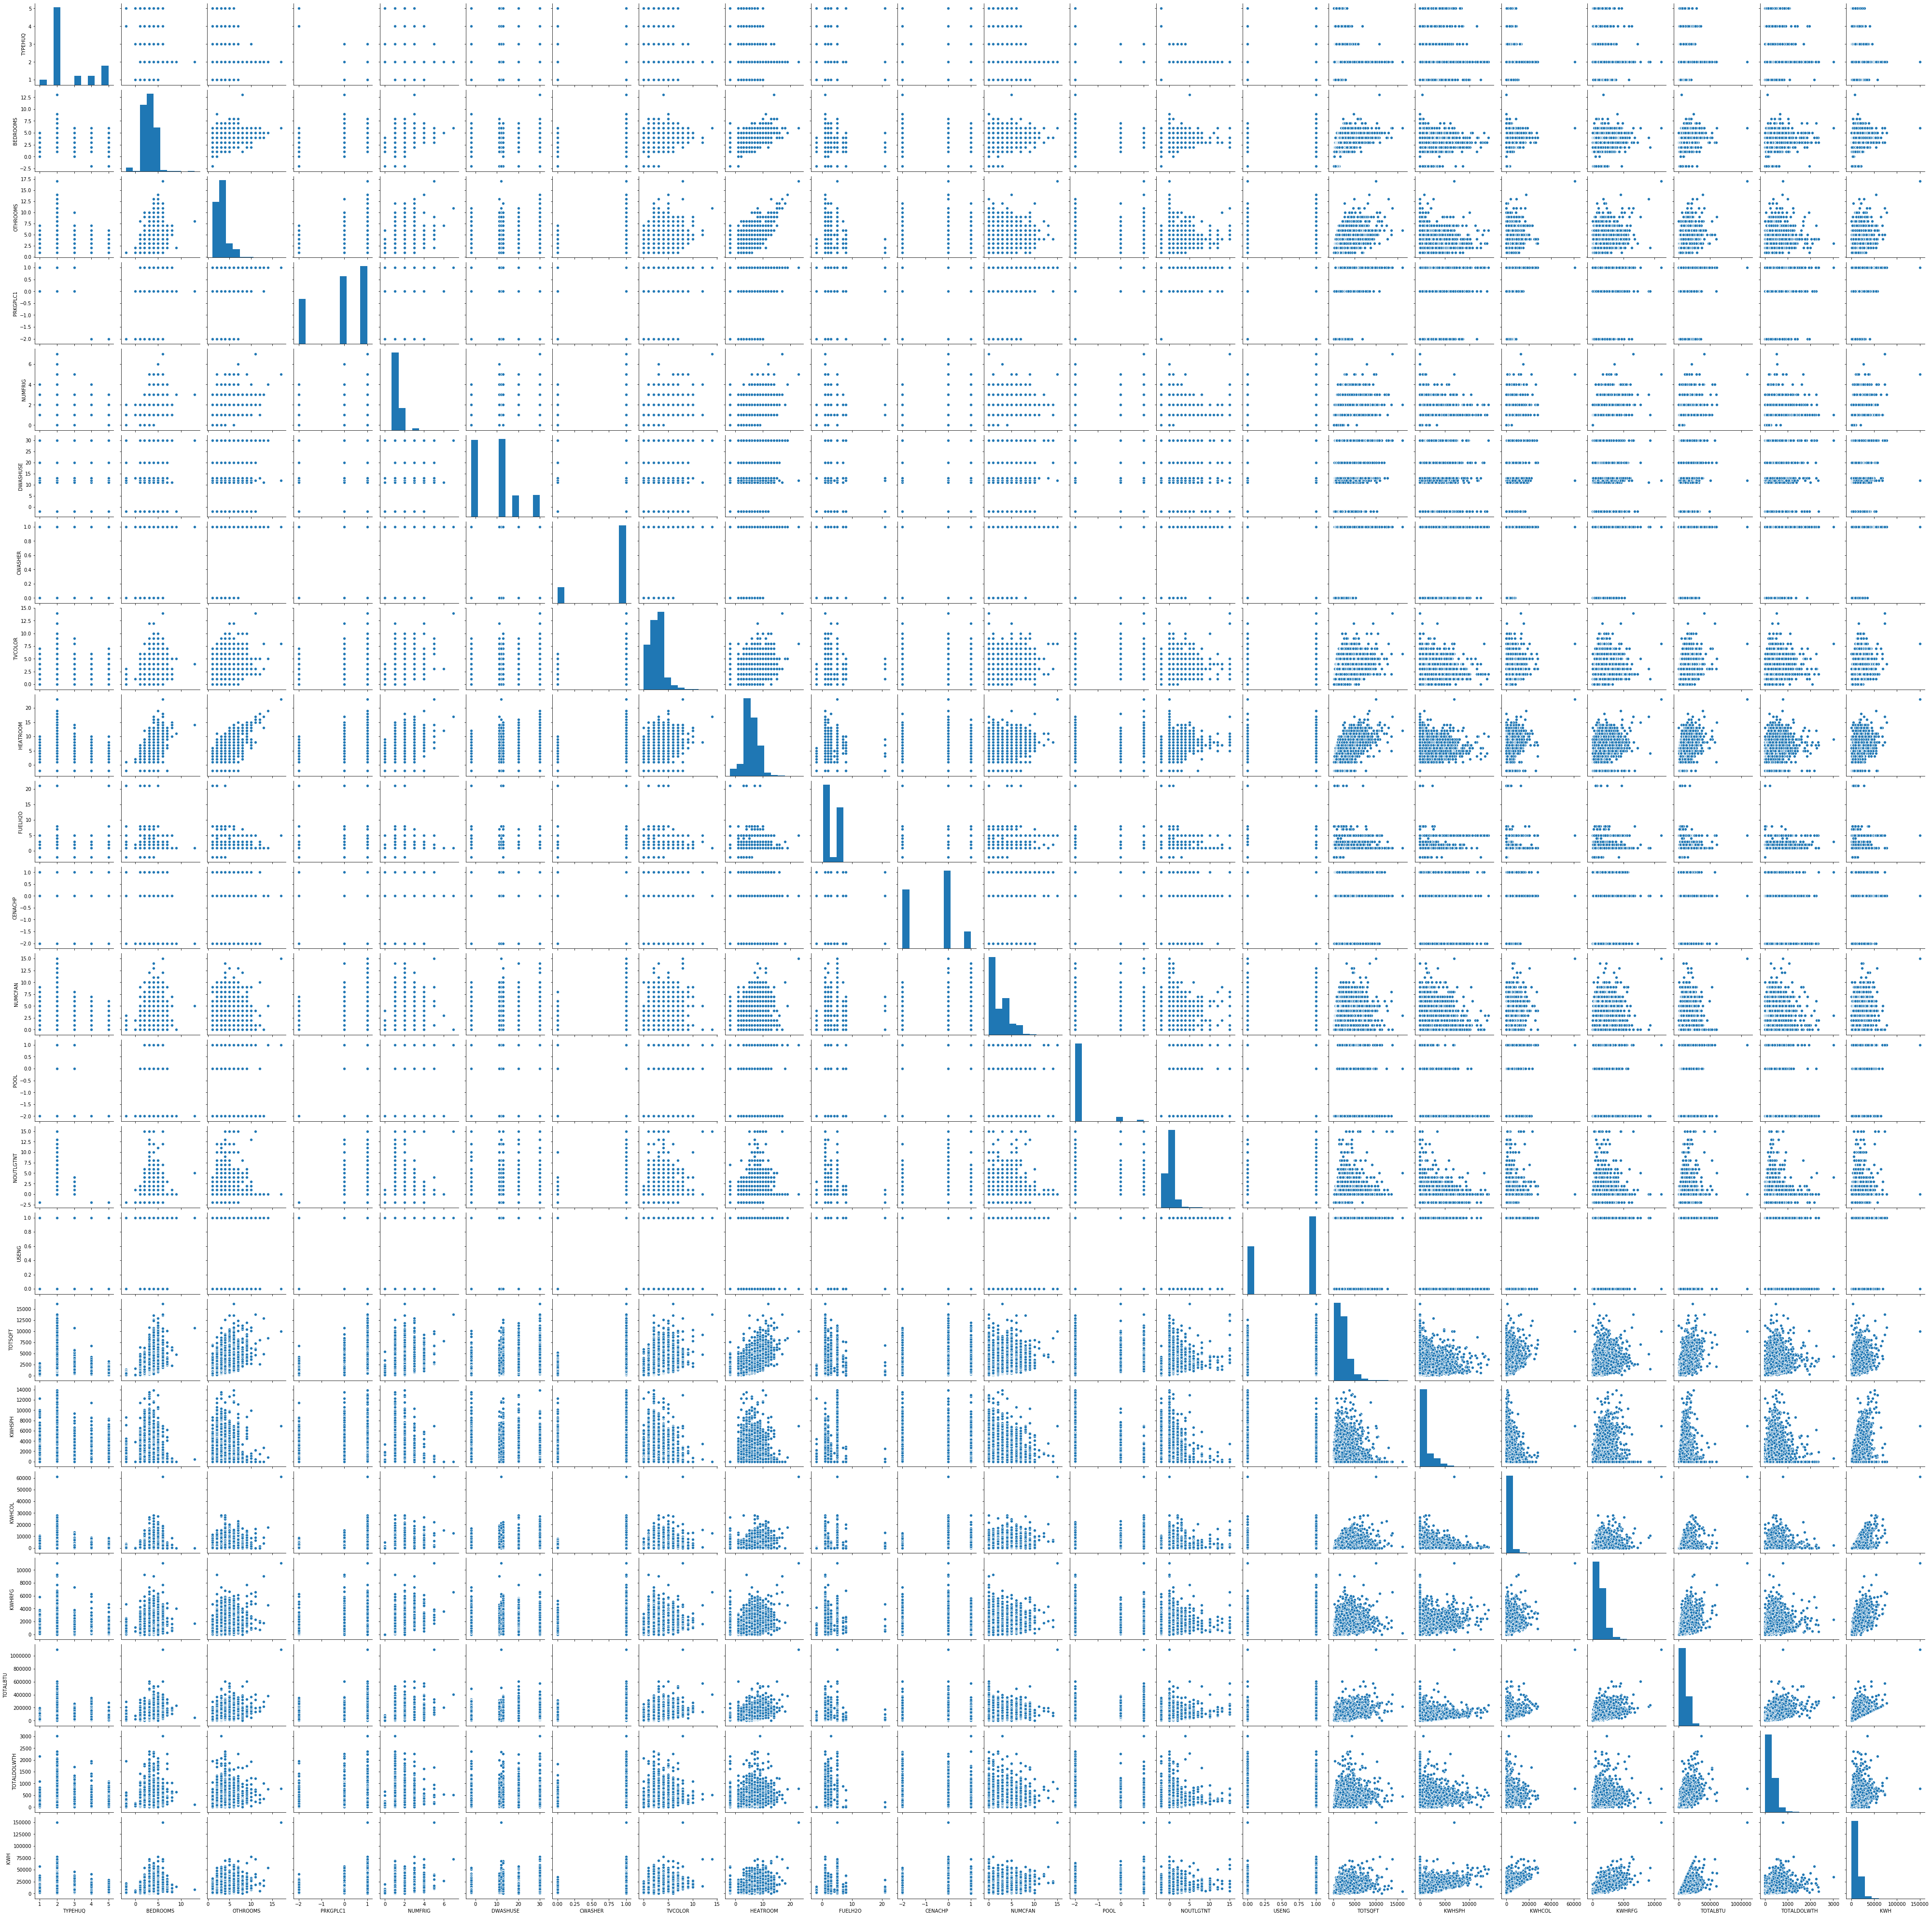

In [0]:

sns.pairplot(processed_df)

In [0]:
# Standardize and normalize the dataset     
#for now not scaling the data
# But scale only the numerical features, not the categorical features - so scaling columns like area, dollarel etc.
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#processed_df['TOTSQFT','TOTHSQFT','TOTCSQFT'] = scaler.fit_transform(processed_df['TOTSQFT','TOTHSQFT','TOTCSQFT'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
#apply these features to ML model

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_df, test_df = train_test_split(processed_df, test_size=0.2)

In [0]:
train_df.head()

,TYPEHUQ,BEDROOMS,OTHROOMS,PRKGPLC1,NUMFRIG,DWASHUSE,CWASHER,TVCOLOR,HEATROOM,FUELH2O,CENACHP,NUMCFAN,POOL,NOUTLGTNT,USENG,TOTSQFT,KWHSPH,KWHCOL,KWHRFG,TOTALBTU,TOTALDOLWTH,KWH
8873,2.0,4.0,5.0,1.0,1.0,30.0,1.0,4.0,4.0,1.0,0.0,2.0,-2.0,0.0,1.0,5772.0,0.00,5306.00,1117.77,131028.0,328.0,18600
11690,2.0,3.0,2.0,1.0,1.0,13.0,1.0,2.0,5.0,1.0,0.0,0.0,-2.0,0.0,1.0,1612.0,4591.93,1303.21,1223.72,126467.0,628.0,12612
9638,2.0,4.0,5.0,1.0,2.0,20.0,1.0,5.0,7.0,1.0,0.0,3.0,-2.0,2.0,1.0,4816.0,0.00,1161.63,3739.33,117277.0,115.0,16257
11322,5.0,1.0,3.0,-2.0,1.0,12.0,1.0,1.0,4.0,5.0,1.0,1.0,-2.0,-2.0,0.0,854.0,666.36,545.37,353.41,13280.0,144.0,3892
7766,5.0,1.0,2.0,-2.0,1.0,-2.0,1.0,0.0,3.0,1.0,-2.0,0.0,-2.0,-2.0,1.0,500.0,486.55,0.00,874.86,86516.0,371.0,3276


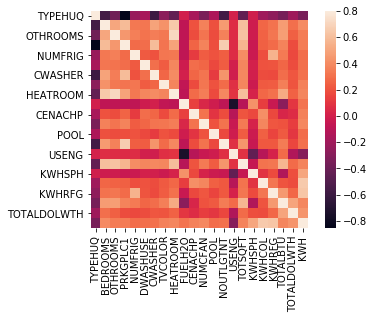

In [0]:
# visualize correlation map for the selected features [view the KWH column or row]

sns.heatmap(train_df.corr(), vmax=.8, square=True);

In [0]:
# overview of features 
sns.pairplot(train_df)

In [0]:
#from kaggle method

In [0]:
from sklearn.model_selection import train_test_split
random_state = 7

In [0]:
# For cross validation 

xt_train_test, xt_valid, yt_train_test, yt_valid = train_test_split(train_df['KWH'], train_df.drop('KWH', axis=1), test_size=.2, random_state=random_state)


In [0]:
xt_train, xt_test, yt_train, yt_test = train_test_split(yt_train_test, xt_train_test, test_size=.2, random_state=random_state)

In [0]:
print("number of training set: %d\nnumber of testing set: %d\nnumber of validation set: %d\ntotal: %d" % (len(xt_train), len(xt_test), len(xt_valid), (len(xt_train)+len(xt_test)+len(xt_valid))))

number of training set: 6185
number of testing set: 1547
number of validation set: 1934
total: 9666


In [0]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

RMSE for Linear Regression Model in sklearn: 2767.19


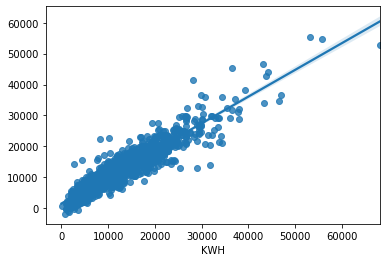

In [0]:
# Linear Model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(xt_train, yt_train)
yt_lm = lm.predict(xt_test)
rmse_linear = rmse(yt_test, yt_lm)
sns.regplot(yt_test, yt_lm)
print("RMSE for Linear Regression Model in sklearn: %.2f" % rmse_linear)

In [0]:
# to indicate good features and thier importance
#plot_importance(lm)

In [0]:
# XG Boost method

In [0]:
import xgboost as xgb
from xgboost import plot_importance

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE for xgboost: 2228.23


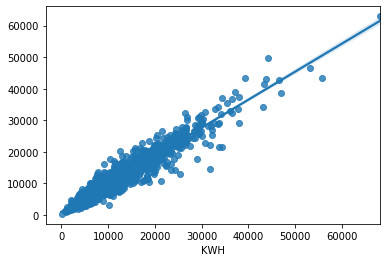

In [0]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()
dtrain = xgb.DMatrix(xt_train, yt_train)
dtest = xgb.DMatrix(xt_test)
num_rounds = 500
xgb_model = xgb.train(plst, dtrain, num_rounds)
yt_xgb = xgb_model.predict(dtest)
rmse_xgb = rmse(yt_test, yt_xgb)
sns.regplot(yt_test, yt_xgb)
print("RMSE for xgboost: %.2f" % rmse_xgb)

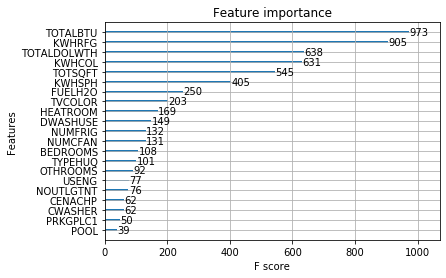

In [0]:
# to indicate good features and thier importance
plot_importance(xgb_model)

In [0]:
# nueral network model

import keras
from keras.models import Sequential
from keras.layers import Dense


In [0]:
def baseline_nn_model(dims):
    model = Sequential()
    model.add(Dense(dims, input_dim=dims,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
def larger_nn_model(dims):
    model = Sequential()
    model.add(Dense(dims, input_dim=dims,kernel_initializer='normal', activation='relu'))
    model.add(Dense(35, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [0]:
def use_keras_nn_model(nn_model, x, y, xx, yy, epoch):
    print("start training")
    for step in range(epoch + 1):
        cost = nn_model.train_on_batch(x.as_matrix(), y.as_matrix())
        if step % 100 == 0:
            print("train cost: %.2f" % cost)
    print("start testing")
    yy_predict = nn_model.predict(xx.as_matrix()).reshape(len(yy),)
    res = rmse(yy, yy_predict)
    sns.regplot(yy, yy_predict)
    print("RMSE for NN Model in Keras(Tensorflow): %.2f" % res)
    return res

start training


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


train cost: 171616688.00
start testing


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RMSE for NN Model in Keras(Tensorflow): 12320.91


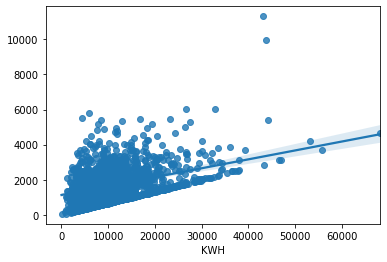

In [0]:
rmse_baselinenn = use_keras_nn_model(baseline_nn_model(xt_train.shape[1]), xt_train, yt_train, xt_test, yt_test, 20)

start training


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


train cost: 183762800.00
start testing


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


RMSE for NN Model in Keras(Tensorflow): 13770.94


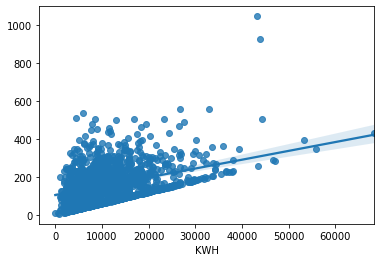

In [0]:

rmse_largernn = use_keras_nn_model(larger_nn_model(xt_train.shape[1]), xt_train, yt_train, xt_test, yt_test, 20)

In [0]:
rmse_nn = min(rmse_baselinenn, rmse_largernn)


In [0]:
print("The minimum RMSE goes to: %.2f" % min([rmse_linear, rmse_nn, rmse_xgb]))
# XG boost model seems to be the champion model here with RMSE :

The minimum RMSE goes to: 2228.23


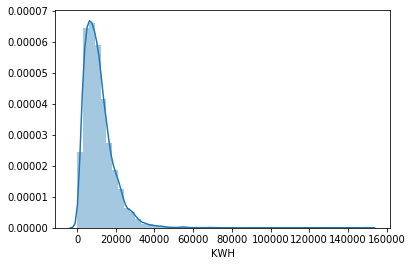

In [0]:
# Plot the FInal dataset test histogram - y_train 

sns.distplot(yt_train)

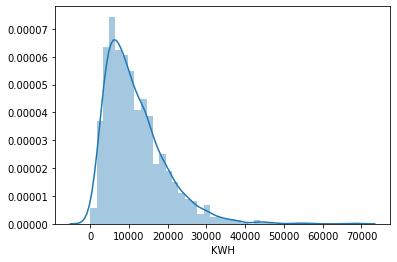

In [0]:
# Plot the Final dataset test histogram - y_test 

sns.distplot(yt_test)

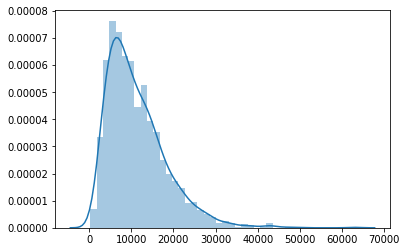

In [0]:
# Plot the FInal dataset predicted by Best mode - xgb 

sns.distplot(yt_xgb)

Thus the histogram plot assumes simialr bell curve shape with peak on around 10,000 value of the 'KWH' bins on x-axis with test and the predicted values